

Hiroshi Ramadhani Purwanto
hiroshipur@gmail.com



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import glob
import cv2
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
pathNow     = "/content/drive/MyDrive/Dicoding" #Where is the path of your files

In [ ]:
# Hyperparameters

numEpochs       = 40
batchSize       = 8
learningRate    = 1e-4
momentumVal     = 0.9
modelName       = 'Coba'
fileNamePlot    = pathNow + '/PlotModel.png'
fileTrModel     = pathNow + '/TrainedModel.h5'
fileNameModel   = pathNow + '/CallbacksModel.hdf5'

In [ ]:
# Defining Image Data Gen

img_shape = (50, 50, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              rescale=1/225,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.4)

In [ ]:
train = image_gen.flow_from_directory(pathNow + '/rps-cv-images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 4,
                                     class_mode = 'categorical',
                                     subset = 'training',
                                     shuffle = True)

validation = image_gen.flow_from_directory(pathNow  + '/rps-cv-images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 4,
                                     class_mode = 'categorical',
                                     subset = 'validation',
                                     shuffle = False)

labels_ = list(train.class_indices.keys())

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 8)         224       
                                                                 
 batch_normalization (Batch  (None, 50, 50, 8)         32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 8)         584       
                                                                 
 batch_normalization_1 (Bat  (None, 25, 25, 8)         32        
 chNormalization)                                                
                                                        

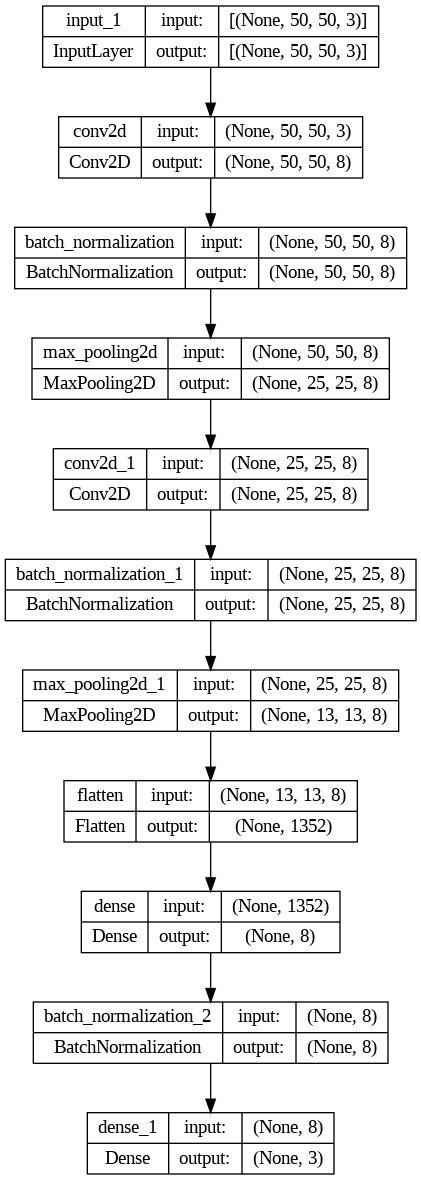

In [ ]:
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten
from keras.models import Model,Sequential
from keras.utils import plot_model
model = Sequential(
    [
        Input(shape=(50, 50, 3)),
        Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),

        Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),

        Flatten(),
        Dense(units=8, activation='relu'),
        BatchNormalization(),
        Dense(units=3, activation='softmax')
    ]
)


model.summary()
plot_model(model, to_file=fileNamePlot, show_shapes=True, show_layer_names=True)

In [ ]:
from keras import regularizers
# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build the model


# Compile the model
opt = keras.optimizers.Adam(learning_rate=learningRate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
checkpoint = keras.callbacks.ModelCheckpoint(fileNameModel, save_best_only=True, monitor='val_loss', verbose=1, mode='auto')
plateau = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr = 1e-7)

# Training
print("Fit model on training data - " + modelName)
startTime = datetime.datetime.now()
history = model.fit(
    train,
    batch_size = batchSize,
    epochs = numEpochs,
    callbacks = [checkpoint, plateau],
    verbose = 1,
    validation_data = validation,
    shuffle=True
)
endTime = datetime.datetime.now()

# Compute time consume in training epochs
diffTime = endTime - startTime
diffTime = diffTime.total_seconds()/60

print('\n' + 'Training finished in : ' + str(diffTime) + ' minutes\n')

# Save the trained model to file
model.save(fileTrModel)

Fit model on training data - Coba
Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.1086 - accuracy: 0.4802
Epoch 1: val_loss improved from inf to 1.15795, saving model to /content/drive/MyDrive/Dicoding/CallbacksModel.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


329/329 [==============================] - 453s 1s/step - loss: 1.1086 - accuracy: 0.4802 - val_loss: 1.1580 - val_accuracy: 0.4245 - lr: 1.0000e-04
Epoch 2/40
328/329 [============================>.] - ETA: 0s - loss: 0.9184 - accuracy: 0.5924
Epoch 2: val_loss improved from 1.15795 to 0.90172, saving model to /content/drive/MyDrive/Dicoding/CallbacksModel.hdf5
329/329 [==============================] - 15s 44ms/step - loss: 0.9192 - accuracy: 0.5921 - val_loss: 0.9017 - val_accuracy: 0.6201 - lr: 1.0000e-04
Epoch 3/40
327/329 [============================>.] - ETA: 0s - loss: 0.8154 - accuracy: 0.6562
Epoch 3: val_loss improved from 0.90172 to 0.73427, saving model to /content/drive/MyDrive/Dicoding/CallbacksModel.hdf5
329/329 [==============================] - 14s 44ms/step - loss: 0.8140 - accuracy: 0.6560 - val_loss: 0.7343 - val_accuracy: 0.7208 - lr: 1.0000e-04
Epoch 4/40
327/329 [============================>.] - ETA: 0s - loss: 0.7596 - accuracy: 0.6646
Epoch 4: val_loss did n

  1/219 [..............................] - ETA: 31s

<ipython-input-10-60c5fbdad61e>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = new_model.predict_generator(validation, verbose = 1)


219/219 [==============================] - 6s 25ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

       paper       0.98      0.93      0.95       284
        rock       0.94      0.98      0.96       290
    scissors       0.97      0.98      0.98       300

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



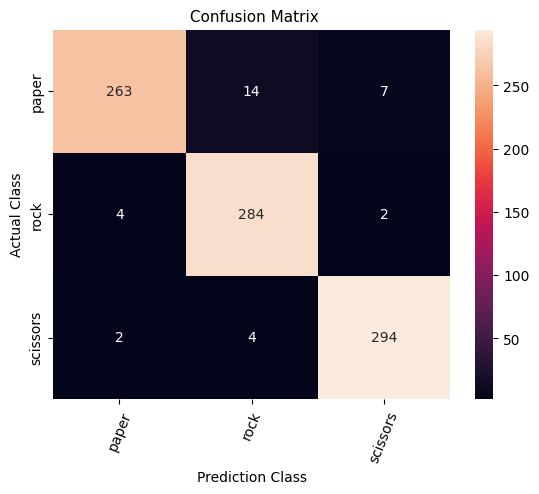

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
new_model = tf.keras.models.load_model(fileTrModel)
predict = new_model.predict_generator(validation, verbose = 1)
y_pred = np.argmax(predict, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation.classes, y_pred)
cm_df = pd.DataFrame(cm, index = labels_, columns = labels_)
sb.heatmap(cm_df, annot=True, fmt="d")
plt.title(' Confusion Matrix' , fontsize=11)
plt.ylabel('Actual Class')
plt.xlabel('Prediction Class')
plt.xticks(rotation = 68)

print('Classification Report')
target_names = labels_
print(classification_report(validation.classes, y_pred, target_names=target_names))

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
1/1 [==============================] - 0s 25ms/step
scissors


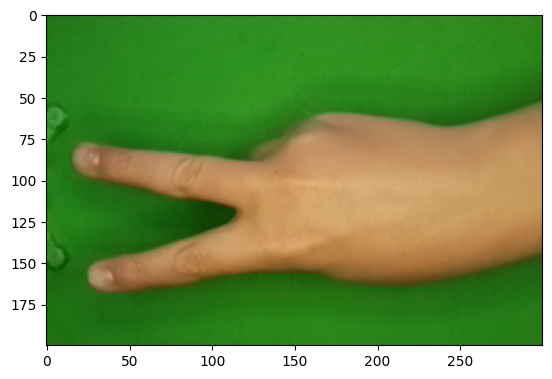

In [ ]:
from google.colab import files
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()
image_size = (50,50)
datagen = ImageDataGenerator(rescale=1.0/255)
for fn in uploaded.keys():
  image_path = fn
  img = image.load_img(image_path, target_size=image_size)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = datagen.standardize(img)
  pred = new_model.predict(img)
  pred = np.argmax(pred, axis=1)
  pred = labels_[pred[0]]
img_ = mpimg.imread(image_path)
imgplot = plt.imshow(img_)
print(pred)